In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime,timedelta 
import calendar


df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.shape

(5268, 13)

In [2]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

# Aircraft Crash Information:

- **Date:** date the crash
- **Time:** time the crash
- **Location:** City, Country
- **Operator:** Airline Name (Royal air maroc,rayanair,.....)
- **Flight #:** Flight Number
- **Route:** Departure - Destination
- **Type:** Aircraft Type (Boeing 737,Airbus A320,....)
- **Registration:** Aircraft Registration (An aircraft registration is a code unique to a single aircraft)
- **cn/In:** Construction/Serial Number(is a unique identifier assigned to each individual aircraft during its manufacturing process)
- **Aboard:** Number of People Aboard
- **Fatalities:** Number of Fatalities
- **Ground:** individuals who are not on board the aircraft but are located in the vicinity of the crash site
- **Summary:** Brief Summary of the Case


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [5]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# Combine 'Date' and 'Time' columns in DateTime

In [6]:
df['Time'] = df['Time'].replace(np.nan, '00:00')
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00') 

# Combine 'Date' and 'Time' columns in DateTime

df['DateTime'] = df['Date'] + ' ' + df['Time']

# Convert 'DateTime' to datetime type

def to_date(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

df['DateTime'] = df['DateTime'].apply(to_date)

# Convert 'Operator' column to uppercase duplicate values 

#remove Date and Time
df = df.drop('Date',axis=1)
df = df.drop('Time',axis=1)

In [7]:
df.sample(2).T

,3575,4112
Location,"Kokoda, Papua New Guinea","Near Skopje, Macedonia"
Operator,Douglas Airways,Volga-Dnepr Airlines
Flight #,NaN,NaN
Route,NaN,NaN
Type,Britten-Norman BN-2A Islander,Antonov 12BK
Registration,P2-DNW,CCCP-11342
cn/In,67,00347607
Aboard,5.0,8.0
Fatalities,3.0,8.0
Ground,0.0,0.0


In [8]:
df = df.drop(['Registration', 'Flight #', 'cn/In'], axis=1) 

In [9]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
def number_to_month(num):
    return calendar.month_name[num]
df['Day'] = df['DateTime'].dt.day_name()

In [10]:
df['Location'].nunique()

4303

In [11]:
df['Location'].value_counts()

Location
Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: count, Length: 4303, dtype: int64

In [12]:
split_location = df['Location'].str.split(',', expand=True)
df['City'] = split_location[0]
df['Country'] = split_location[1]
df = df.drop('Location',axis=1)

In [13]:
df.sample(2).T

,1444,807
Operator,Indian Airlines,Military - Royal Air Force
Route,NaN,Hong Kong - Singapore
Type,Douglas DC-3,Douglas C-47B-25-DK
Aboard,3.0,19.0
Fatalities,3.0,19.0
Ground,0.0,0.0
Summary,The cargo plane crashed after an attempted go-...,"The aircraft departed Hong Kong, Runway 31, cl..."
DateTime,1956-10-19 00:00:00,1946-09-25 09:31:00
Year,1956,1946
Month,10,9


In [14]:
df['Type'].sample(10)

2156                     Breguet 1150
2262                 Douglas C-47A-25
1323              Douglas C-47A-30-DK
321         Sikorsky S-38 Flying Boat
658     Consolidated Catalina PB2Y-3R
1441                    Stinson AT-19
4680            British Aerospace APT
4387                 Boeing B-757-223
2608    Convair CV-990-30A-5 Coronado
3838        Pilatus PC-6 Turbo Porter
Name: Type, dtype: object

In [15]:
df['Type'] = df['Type'].fillna('') 

def extract_word(row):
    words = row.split()
    if words and len(words[0]) < 3:
        return max(words, key=len)
    elif words:
        return words[0]
    else:
        return ''

df['Company'] = df['Type'].apply(extract_word)

In [16]:
df['Company'].sample(10)

2450          Ilyushin
27           Havilland
734     Curtiss-Wright
4732      Aerospatiale
3165            Boeing
4068          MDonnell
173          Latecoere
4642            Hawker
3930          Sikorsky
680               Ford
Name: Company, dtype: object

In [17]:
df['Operator'].value_counts()


Operator
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
Air Taxi                                44
                                      ... 
Military - Argentine Navy                1
Richland Flying Service - Air Taxii      1
Harbor Airlines - Air Taxi               1
Aerovias Venezolanas SA (Venezuela)      1
Strait Air                               1
Name: count, Length: 2476, dtype: int64

In [18]:
df['Operator'].nunique()

2476

In [19]:
df['Operator'] = df['Operator'].str.upper()
df['Operator'].fillna('', inplace=True)

ope_conditions = [
    df['Operator'].str.contains('MAIL|EXPRESS|TRANSPORT|SERVICE', case=False, regex=True),
    df['Operator'].str.contains('PRIVATE', case=False),
    df['Operator'].str.contains('AIR FORCE|MILITARY', case=False, regex=True)
]

flight_type_values = ['cargo', 'private', 'military']

df['Flight Type'] = np.select(ope_conditions, flight_type_values, default='passenger')



In [20]:
df.sample(3).T

,3537,2799,3198
Operator,MILITARY - RUSSIAN AIR FORCE,TURKISH AIRLINES (THY),IRAN NATIONAL AIRLINES
Route,NaN,Izmir - Istanbul,Babol Sar - Tehran
Type,Ilyushin IL-76MD,Fokker F-28 Fellowship 1000,Boeing B-727-86
Aboard,57.0,42.0,128.0
Fatalities,57.0,42.0,128.0
Ground,0.0,0.0,0.0
Summary,Crashed into the Caspian sea after reporting a...,After an electrical failure at the airport the...,The aircraft crashed into a mountain during a ...
DateTime,1989-10-18 00:00:00,1975-01-30 00:00:00,1980-01-21 19:10:00
Year,1989,1975,1980
Month,10,1,1


In [21]:
df['Survivors'] = df['Aboard'] - df['Fatalities']

In [22]:
df['Summary'] = df['Summary'].str.lower()

df['Summary'].fillna('', inplace=True)

def get_phase(summary):
    if 'landing' in summary.lower() or 'land' in summary.lower() or 'descending' in summary.lower():
        return 'While landing'
    elif 'en route' in summary.lower() or 'route' in summary.lower():
        return 'While en route'
    elif 'taking off' in summary.lower() or 'takeoff' in summary.lower():
        return 'While taking off'
    else:
        return 'unknown'

def get_cause(summary):
    if 'shot down by' in summary.lower():
        return 'War'
    elif any(keyword in summary.lower() for keyword in ['weather','icing ', 'fog', 'storm', 'lightning']):
        return 'Weather conditions'
    elif any(keyword in summary.lower() for keyword in ['pilot', 'pilot error']):
        return 'Pilot error'
    elif any(keyword in summary.lower() for keyword in ['engine', 'engine failure']):
        return 'Engine failure'
    elif any(keyword in summary.lower() for keyword in ['fire']):
        return 'Fire'
    elif any(keyword in summary.lower() for keyword in ['collided']):
        return 'Clash'
    else:
        return 'unknown'

df['Phase'] = df['Summary'].apply(get_phase)
df['Cause'] = df['Summary'].apply(get_cause)

df['%Survivors'] = (df['Survivors'] / df['Aboard']) * 100

In [23]:
new_column_order = ['DateTime','Year','Month','Day','City', 'Country', 'Operator', 'Type', 'Company',
                    'Route', 'Aboard', 'Fatalities', 'Ground','Survivors', 'Flight Type', 'Phase','Cause','Summary','%Survivors']
df = df[new_column_order]

In [24]:
df.sample(5).T

,2579,2606,126,3038,2012
DateTime,1972-08-12 04:00:00,1972-11-28 19:51:00,1927-11-16 00:00:00,1978-02-27 13:25:00,1965-11-08 19:02:00
Year,1972,1972,1927,1978,1965
Month,8,11,11,2,11
Day,Saturday,Tuesday,Wednesday,Monday,Monday
City,Near SoTrang,Near Moscow,Strasburg,Merrill Pass,Cincinnati Airport
Country,South Vietnam,Russia,France,Alaska,near Covington
Operator,MILITARY - U.S. AIR FORCE,JAPAN AIR LINES,CIDNA,YUTE AIR ALASKA - AIR TAXI,AMERICAN AIRLINES
Type,Lockheed C-130E,McDonnell Douglas DC-8-62,Farman F-121 Jabiru,Evangel 4500,Boeing B-727-23
Company,Lockheed,McDonnell,Farman,Evangel,Boeing
Route,NaN,Moscow - Tokyo,NaN,"Dillingham, AK - Anchorage, AK",New York City - Cincinnati


In [25]:
df.to_csv('Airplane_Crashes_LV2.csv')

In [26]:
df.columns

Index(['DateTime', 'Year', 'Month', 'Day', 'City', 'Country', 'Operator',
       'Type', 'Company', 'Route', 'Aboard', 'Fatalities', 'Ground',
       'Survivors', 'Flight Type', 'Phase', 'Cause', 'Summary', '%Survivors'],
      dtype='object')

# Aircraft Crash New Information:

- **DateTime:** date the crash
- **Year:** Year the crash
- **Month:** Month the crash
- **Day:** Day the crash
- **City:**
- **Company:**
- **Operator:** Airline Name (Royal air maroc,rayanair,.....)
- **Type:** Aircraft Type (Boeing 737,Airbus A320,....)
- **Route:** Departure - Destination
- **Aboard:** Number of People Aboard
- **Fatalities:** Number of Fatalities
- **Ground:** individuals who are not on board the aircraft but are located in the vicinity of the crash site
- **Survivors:**
- **Flight Type:** 
- **Phase:** The phase of the accident (landing,en route,taking off)
- **Cause:** The cause of the accident (weather condition ..  . . . .) 
- **Summary:** Brief Summary of the Case


In [27]:
df.head()

,DateTime,Year,Month,Day,City,Country,Operator,Type,Company,Route,Aboard,Fatalities,Ground,Survivors,Flight Type,Phase,Cause,Summary,%Survivors
0,1908-09-17 17:18:00,1908,9,Thursday,Fort Myer,Virginia,MILITARY - U.S. ARMY,Wright Flyer III,Wright,Demonstration,2.0,1.0,0.0,1.0,military,unknown,unknown,"during a demonstration flight, a u.s. army fly...",50.0
1,1912-07-12 06:30:00,1912,7,Friday,AtlantiCity,New Jersey,MILITARY - U.S. NAVY,Dirigible,Dirigible,Test flight,5.0,5.0,0.0,0.0,military,unknown,unknown,first u.s. dirigible akron exploded just offsh...,0.0
2,1913-08-06 00:00:00,1913,8,Wednesday,Victoria,British Columbia,PRIVATE,Curtiss seaplane,Curtiss,NaN,1.0,1.0,0.0,0.0,private,unknown,Weather conditions,the first fatal airplane accident in canada oc...,0.0
3,1913-09-09 18:30:00,1913,9,Tuesday,Over the North Sea,None,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),Zeppelin,NaN,20.0,14.0,0.0,6.0,military,While landing,Weather conditions,the airship flew into a thunderstorm and encou...,30.0
4,1913-10-17 10:30:00,1913,10,Friday,Near Johannisthal,Germany,MILITARY - GERMAN NAVY,Zeppelin L-2 (airship),Zeppelin,NaN,30.0,30.0,0.0,0.0,military,unknown,Engine failure,hydrogen gas which was being vented was sucked...,0.0


  ## Data Visualization Part:

  ### Objectives:

  #### By analyzing and visualizing our dataset, we aim to reveal answers for the following questions:

  1. Is the number of aircrashes reduced over
years? (Y/N).
  2. What types of airplanes are the most known with aircrashes issues?
  3. What are the operators that are the most known with aircrashes issues?
  4. In which phase the aircrashes may frequently happens?
  5. To what an aircrash is due?
  6. What countries are the most known with aircrashes issues?

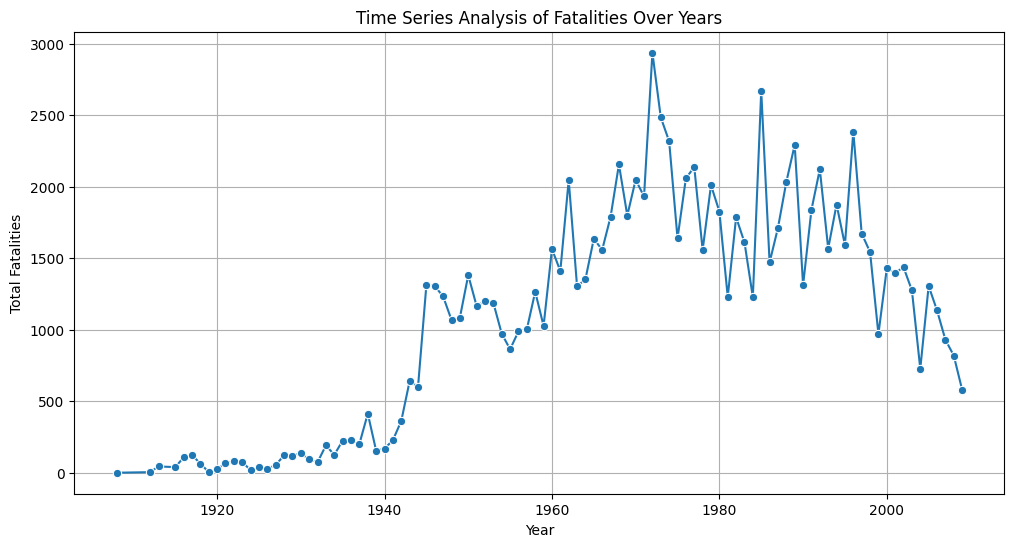

In [28]:
plt.figure(figsize=(12, 6))

fatalities_by_year = df.groupby('Year')['Fatalities'].sum().reset_index()
sns.lineplot(x='Year', y='Fatalities', data=fatalities_by_year, marker='o')

plt.title('Time Series Analysis of Fatalities Over Years')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_8252\1017901100.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_fatalities.index, y=yearly_fatalities, palette="viridis")


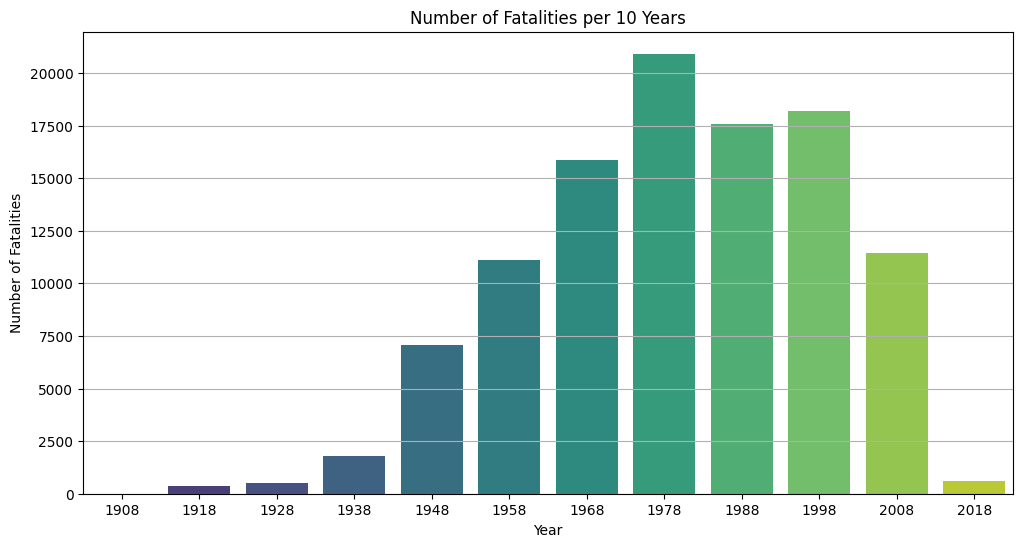

In [30]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

plt.figure(figsize=(12, 6))

# Resample the data by 10 years and sum the fatalities
yearly_fatalities = df.resample('10Y').sum()['Fatalities']

# Convert the index to string for better readability in the plot
yearly_fatalities.index = yearly_fatalities.index.year.astype(str)

# Plot using Seaborn for a more visually appealing plot
sns.barplot(x=yearly_fatalities.index, y=yearly_fatalities, palette="viridis")

# Customize the plot
plt.title('Number of Fatalities per 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.show()